In [146]:
import yfinance as yf
from pandas_datareader import data as pdr
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates

pd.set_option('display.width', 1000)

In [147]:
yf.pdr_override()

In [148]:
start = '2019-01-01'
data = pdr.get_data_yahoo('005930.KS', start=start)
data.drop('Adj Close', axis=1, inplace=True)

[*********************100%***********************]  1 of 1 completed


In [149]:
data['Prev_close'] = data['Close'].shift()
data['Rate'] = (data['Close'] - data['Prev_close']) / data['Prev_close'] * 100
data['Rate'][0] = (data['Close'][0] - data['Open'][0]) / data['Open'][0] * 100
data['Rate'] = data['Rate'].round(decimals=2)

data.reset_index(inplace=True)
data['Date'] = data['Date'].dt.strftime('%Y-%m-%d')
data.set_index(data['Date'], inplace=True)
data.drop(['Date', 'Prev_close'], axis=1, inplace=True)

c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


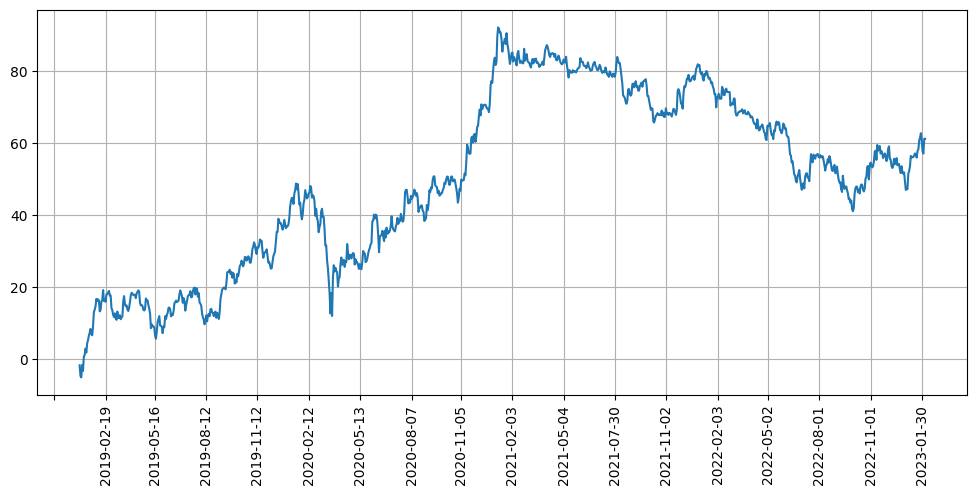

In [150]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Rate'].cumsum())
plt.grid()
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
plt.show()

In [151]:
window_size = 20
data_rolling = data['Close'].rolling(window_size, min_periods=1)
data[f'MA_{window_size}'] = data_rolling.mean().astype(np.int32)

In [152]:
data['Upper Band'] = data[f'MA_{window_size}'] + (2 * data_rolling.std())
data['Lower Band'] = data[f'MA_{window_size}'] - (2 * data_rolling.std())
data['Upper Band'][0] = data[f'MA_{window_size}'][0] + (2 * np.std([data['Open'][0], data['Close'][0]]))
data['Lower Band'][0] = data[f'MA_{window_size}'][0] - (2 * np.std([data['Open'][0], data['Close'][0]]))

data['Upper Band'] = data['Upper Band'].round(2)
data['Lower Band'] = data['Lower Band'].round(2)

c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\ozing\miniconda3\envs\RL_trader\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


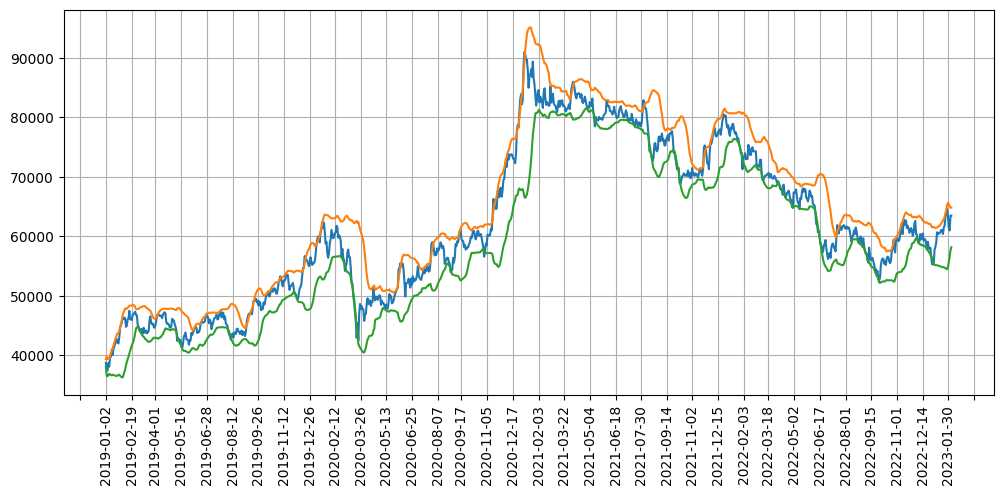

In [153]:
plt.figure(figsize=(12, 5))
plt.plot(data.index, data['Close'])
plt.plot(data.index, data['Upper Band'])
plt.plot(data.index, data['Lower Band'])
plt.grid()
plt.xticks(rotation=90)
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1))
plt.show()

In [154]:
kospi = pdr.get_data_yahoo('^KS11', start=start)

[*********************100%***********************]  1 of 1 completed


In [155]:
kospi.reset_index(inplace=True)
kospi['Date'] = kospi['Date'].dt.strftime('%Y-%m-%d')
kospi.set_index(kospi['Date'], inplace=True)
kospi.drop(['Date'], axis=1, inplace=True)

In [156]:
df = pd.concat([data, kospi['Close'].round(2)], axis=1)
df.columns = data.columns.append(pd.Index(['Kospi']))

In [157]:
df

,Open,High,Low,Close,Volume,Rate,MA_20,Upper Band,Lower Band,Kospi
Date,,,,,,,,,,
2019-01-02,39400.0,39400.0,38550.0,38750.0,7847664,-1.65,38750,39400.00,38100.00,2010.00
2019-01-03,38300.0,38550.0,37450.0,37600.0,12471493,-2.97,38175,39801.35,36548.65,1993.70
2019-01-04,37450.0,37600.0,36850.0,37450.0,14108958,-0.40,37933,39355.44,36510.56,2010.25
2019-01-07,38000.0,38900.0,37800.0,38750.0,12748997,3.47,38137,39556.80,36717.20,2037.10
2019-01-08,38000.0,39200.0,37950.0,38100.0,12756554,-1.68,38130,39360.04,36899.96,2025.27
...,...,...,...,...,...,...,...,...,...,...
2023-01-30,64900.0,64900.0,63100.0,63300.0,59628,-2.01,60245,65643.04,54846.96,2450.47
2023-01-31,63500.0,63700.0,61000.0,61400.0,163847,-3.00,60550,65436.72,55663.28,2425.08
2023-02-01,62600.0,62700.0,61000.0,61000.0,98585,-0.65,60825,65095.28,56554.72,2449.80


In [158]:
df[df['Volume']==0]

,Open,High,Low,Close,Volume,Rate,MA_20,Upper Band,Lower Band,Kospi
Date,,,,,,,,,,
2020-03-09,56500.0,56500.0,56500.0,56500.0,0,0.0,58175,62762.34,53587.66,1954.77
2020-03-12,52100.0,52100.0,52100.0,52100.0,0,0.0,57060,62621.67,51498.33,1834.33
2022-01-26,74000.0,74000.0,74000.0,74000.0,0,0.0,77285,80613.52,73956.48,2709.24
2022-02-08,73000.0,73000.0,73000.0,73000.0,0,0.0,75660,80255.83,71064.17,2746.47
2022-02-09,73000.0,73000.0,73000.0,73000.0,0,0.0,75395,79961.00,70829.00,2768.85
2022-02-21,74300.0,74300.0,74300.0,74300.0,0,0.0,74110,76441.39,71778.61,2743.80
2022-02-22,74300.0,74300.0,74300.0,74300.0,0,0.0,74000,76046.82,71953.18,2706.79
2022-02-23,74300.0,74300.0,74300.0,74300.0,0,0.0,73935,75845.94,72024.06,2719.53
2022-02-28,71900.0,71900.0,71900.0,71900.0,0,0.0,73545,75935.75,71154.25,2699.18


In [159]:
ticker = "AAPL"
stock_info = yf.Ticker(ticker)

In [160]:
stock_info.info['trailingPE']
stock_info.info['priceToBook']

43.14437

In [ ]:
import tensorflow as tf
from keras.layers import Input, Transformer, Dense
from keras.models import Model

# Define the transformer model
def create_transformer_model(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)
    transformer_layer = Transformer(
        num_heads=8,
        d_model=128,
        dff=512,
        input_shape=input_shape,
        rate=0.1
    )(input_tensor)
    dense_layer = Dense(64, activation='relu')(transformer_layer)
    output_tensor = Dense(num_classes, activation='softmax')(dense_layer)
    model = Model(inputs=input_tensor, outputs=output_tensor)
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model


In [ ]:
from keras.layers import Layer, Dropout, LayerNormalization, Conv1D, Concatenate, GlobalAveragePooling1D

batch_size = 32
seq_len = 128

d_k = 256
d_v = 256
n_heads = 12
ff_dim = 256

class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)
    
    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1) # Convert (batch, seq_len, 5) to (batch, seq_len)
    time_linear = self.weights_linear * x + self.bias_linear
    time_linear = tf.expand_dims(time_linear, axis=-1) # (batch, seq_len, 1)
    
    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # (batch, seq_len, 2)

class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
    self.key = Dense(self.d_k, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')
    self.value = Dense(self.d_v, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)
    
    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out 


class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))  
    self.linear = Dense(7, input_shape=input_shape, kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear 

class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='relu')
    self.ff_conv1D_2 = Conv1D(filters=7, kernel_size=1) # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7 
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)    
  
  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer 

def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  model = Model(inputs=in_seq, outputs=out)
  model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mape'])
  return model

transformer = create_model()
transformer.